### Sparsity Constraint on the Encoded Representations

Differences compared to the [previous example](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/intro.ipynb):  
- *L1* regularizer has been included in the encoder dense layer
- Number of epochs have been increased from 50 to 100 (it is possible without overtraining thanks to regularization)
- *encoded_imgs.mean()* was $8.9$ in [intro](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/intro.ipynb). It is $1.3$ for this example thanks to regularization
- *encoded_imgs.std()* was $4.6$ in [intro](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/intro.ipynb). It is $0.8$ for this example

Previous example: [/examples/autoencoders/intro.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/intro.ipynb)  
Modified from: [blog.keras.io/building-autoencoders-in-keras](https://blog.keras.io/building-autoencoders-in-keras.html)  
Next example: [/examples/autoencoders/convnet.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/convnet.ipynb)

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

print('autoencoder:'); autoencoder.summary(); print()
print('encoder:'); encoder.summary(); print()
print('decoder:'); decoder.summary()

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

autoencoder:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________

encoder:
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
       

2022-12-30 13:45:52.112578: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-30 13:45:52.112684: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
(x_train, _), (x_test, _) = mnist.load_data() # Labels ignored
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(f'{x_train.shape = }')
print(f'{x_test.shape = }')

x_train.shape = (60000, 784)
x_test.shape = (10000, 784)


In [4]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100


2022-12-30 13:45:52.642517: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-30 13:45:52.814465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 6ms/step - loss: 0.2867 - val_loss: 0.2019
Epoch 2/100
  1/235 [..............................] - ETA: 1s - loss: 0.2008

2022-12-30 13:45:55.020297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 5ms/step - loss: 0.1809 - val_loss: 0.1632
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1544 - val_loss: 0.1442
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1394 - val_loss: 0.1324
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1295 - val_loss: 0.1241
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1224 - val_loss: 0.1182
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1174 - val_loss: 0.1141
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1139 - val_loss: 0.1112
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1115 - val_loss: 0.1091
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1096 - val_loss: 0.1076
Epoch 11/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1083 - val_loss: 0.1064


In [5]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test, verbose=0)
decoded_imgs = decoder.predict(encoded_imgs, verbose=0)
print(f'{encoded_imgs.mean() = }')
print(f'{encoded_imgs.std() = }')

2022-12-30 13:47:49.825106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-30 13:47:50.157988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


encoded_imgs.mean() = 1.2759832
encoded_imgs.std() = 0.8427344


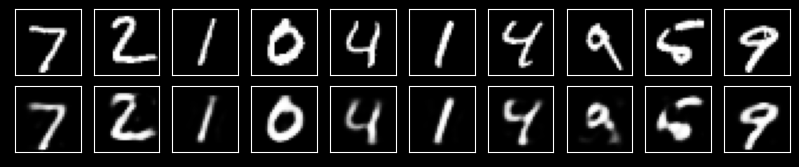

In [6]:
num_of_digits_to_display = 10
plt.style.use('dark_background')
fig = plt.figure(figsize=(10, 2))
fig.subplots_adjust(hspace=0)
for digit_idx in range(num_of_digits_to_display):
    # Display original
    ax = plt.subplot(2, num_of_digits_to_display, digit_idx + 1)
    plt.imshow(x_test[digit_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, num_of_digits_to_display, digit_idx + 1 + num_of_digits_to_display)
    plt.imshow(decoded_imgs[digit_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Previous example: [/examples/autoencoders/intro.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/intro.ipynb)  
Modified from: [blog.keras.io/building-autoencoders-in-keras](https://blog.keras.io/building-autoencoders-in-keras.html)  
Next example: [/examples/autoencoders/convnet.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/convnet.ipynb)